In [1]:
# ! pip install pandas 
# ! pip install matplotlib
# ! pip install seaborn
# ! pip install plotly

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

In [3]:
train_data_path = '../data/fraudTrain.csv'
#load and display data
df_train = pd.read_csv(train_data_path)
print("First 5 rows of the training dataset:")
df_train.head()

First 5 rows of the training dataset:


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
print(f"Dataset shape: {df_train.shape}")

print("\nDataset Info:")
df_train.info()
#check for any missing values
print("\nMissing values per column:")
print(df_train.isnull().sum())

Dataset shape: (1296675, 23)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    12966

Class Distribution:
is_fraud
0    1289169
1       7506
Name: count, dtype: int64

Percentage of fraudulent transactions: 0.5789%


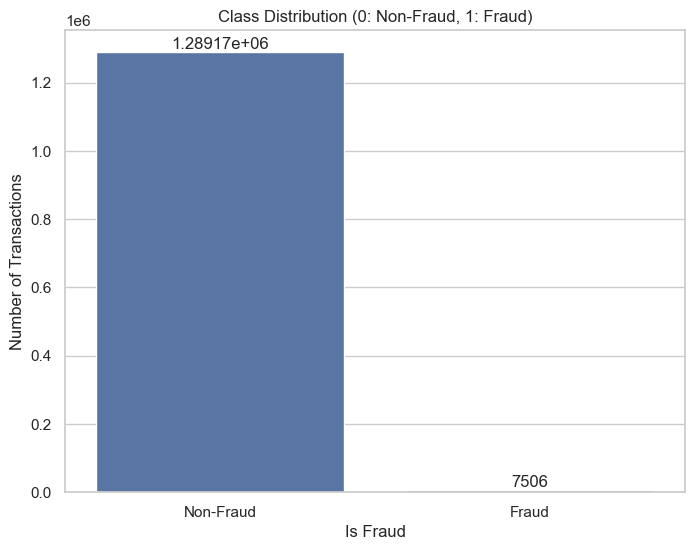

In [5]:
# Calculate class distribution
class_counts = df_train['is_fraud'].value_counts()
fraud_percentage = (class_counts[1] / class_counts.sum()) * 100

print("Class Distribution:")
print(class_counts)
print(f"\nPercentage of fraudulent transactions: {fraud_percentage:.4f}%")

# plot
plt.figure(figsize=(8, 6))
sns.countplot(x='is_fraud', data=df_train)
plt.title('Class Distribution (0: Non-Fraud, 1: Fraud)')
plt.xlabel('Is Fraud')
plt.ylabel('Number of Transactions')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
# labels
ax = plt.gca()
for container in ax.containers:
    ax.bar_label(container)
plt.show()

- In the data set we have a column called is_fraud in which non-fraudulent transactions are marked 0 and fraudulent is marked 1.
- As we can see in the above plot there are less number of frauds with credit card.

Transaction Amount Statistics:
count    1.296675e+06
mean     7.035104e+01
std      1.603160e+02
min      1.000000e+00
25%      9.650000e+00
50%      4.752000e+01
75%      8.314000e+01
max      2.894890e+04
Name: amt, dtype: float64


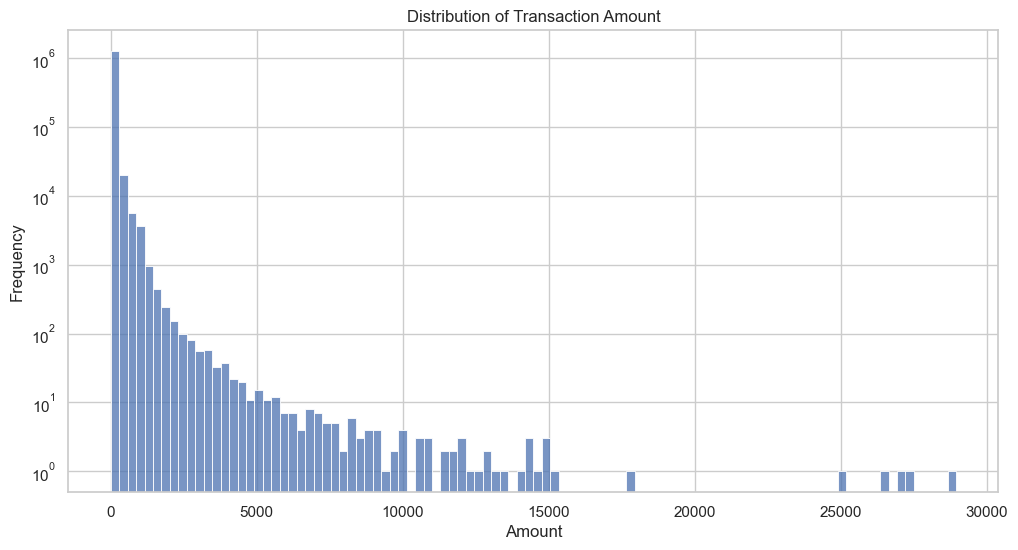

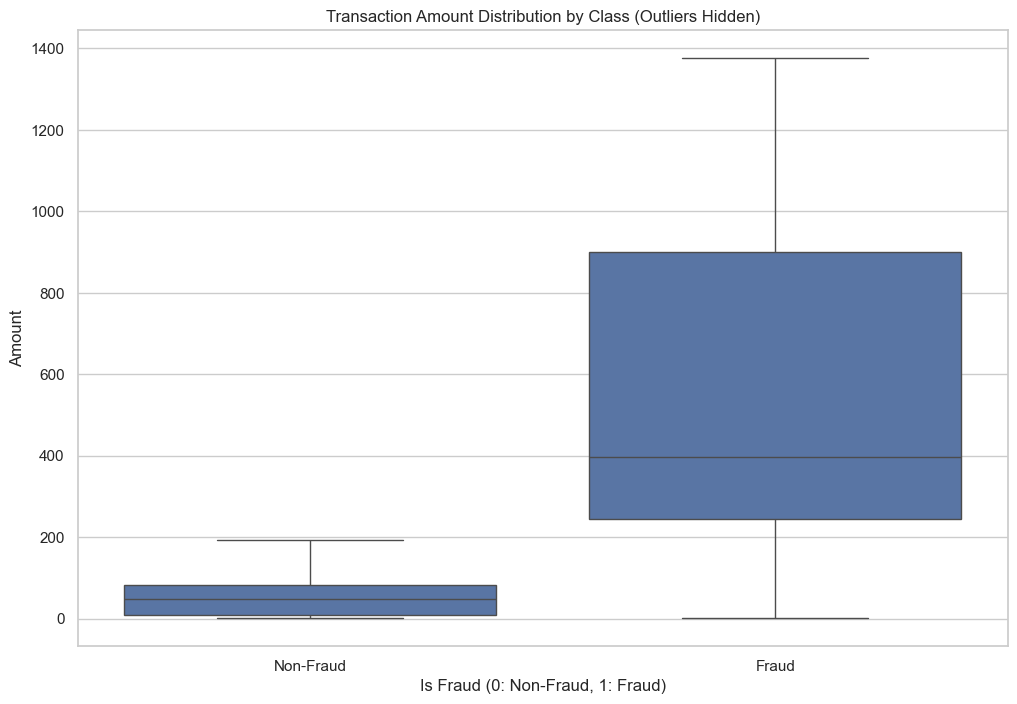


Amount Statistics for Non-Fraudulent Transactions:
count    1.289169e+06
mean     6.766711e+01
std      1.540080e+02
min      1.000000e+00
25%      9.610000e+00
50%      4.728000e+01
75%      8.254000e+01
max      2.894890e+04
Name: amt, dtype: float64

Amount Statistics for Fraudulent Transactions:
count    7506.000000
mean      531.320092
std       390.560070
min         1.060000
25%       245.662500
50%       396.505000
75%       900.875000
max      1376.040000
Name: amt, dtype: float64


In [6]:
# transaction amlunt statistics
print("Transaction Amount Statistics:")
print(df_train['amt'].describe())

# plot
plt.figure(figsize=(12, 6))
sns.histplot(df_train['amt'], bins=100, kde=False)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.yscale('log')
plt.show()


plt.figure(figsize=(12, 8))
sns.boxplot(x='is_fraud', y='amt', data=df_train, showfliers=False) 
plt.title('Transaction Amount Distribution by Class (Outliers Hidden)')
plt.xlabel('Is Fraud (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Amount')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.show()

# comapring fraud and non-fraud
print("\nAmount Statistics for Non-Fraudulent Transactions:")
print(df_train[df_train['is_fraud'] == 0]['amt'].describe())

print("\nAmount Statistics for Fraudulent Transactions:")
print(df_train[df_train['is_fraud'] == 1]['amt'].describe())

- In the histogram the data is mostly skewed to the left as the amount of transaction is low. The frequency is also set at log scale so we can visualize the complete data.
- In the boxplot we can observe that the median amount of transaction of fraudulent data is higher than the non-fraudulent data.

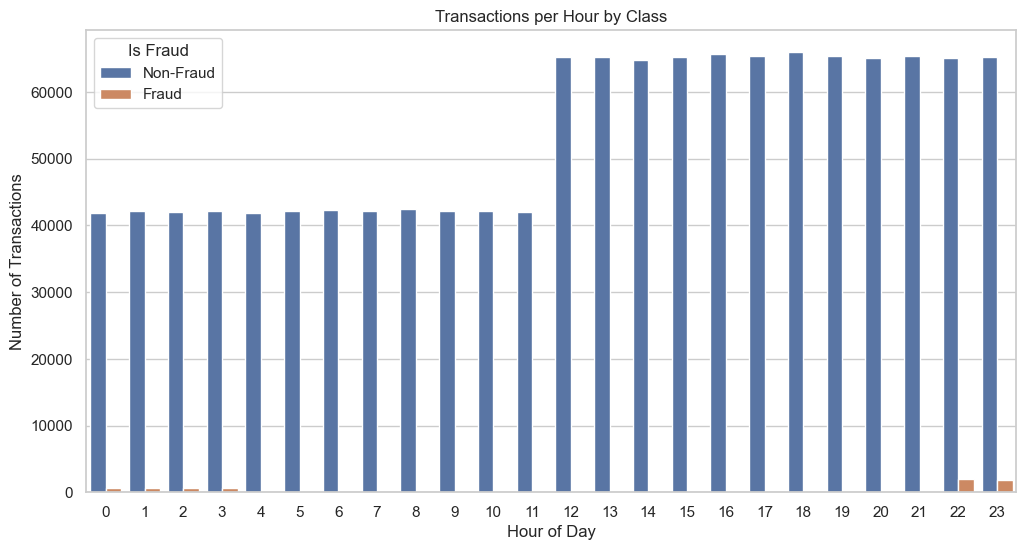

In [7]:

df_train['trans_datetime'] = pd.to_datetime(df_train['trans_date_trans_time'])

# Extract time features
df_train['trans_hour'] = df_train['trans_datetime'].dt.hour
df_train['trans_day_of_week'] = df_train['trans_datetime'].dt.dayofweek # Monday=0, Sunday=6
df_train['trans_month'] = df_train['trans_datetime'].dt.month


plt.figure(figsize=(12, 6))
sns.countplot(x='trans_hour', data=df_train, hue='is_fraud')
plt.title('Transactions per Hour by Class')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.legend(title='Is Fraud', labels=['Non-Fraud', 'Fraud'])
plt.show()


- As we can observe in the plot, most of the fraudulent transactions occur between 10PM to 3AM.

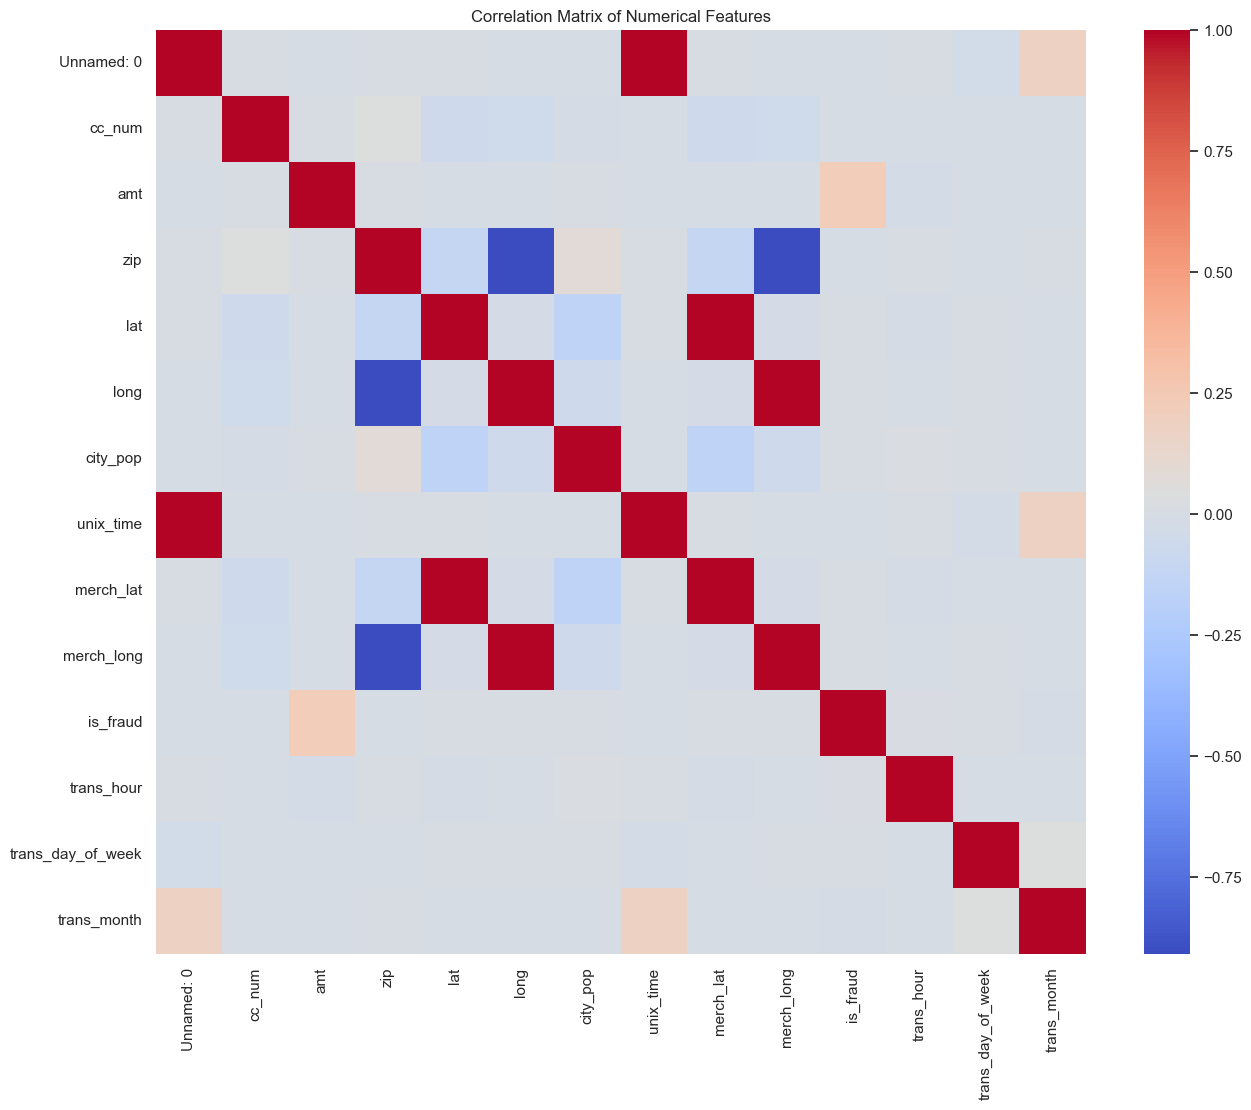


Correlation with 'is_fraud':
is_fraud             1.000000
amt                  0.219404
trans_hour           0.013799
city_pop             0.002136
lat                  0.001894
merch_lat            0.001741
trans_day_of_week    0.001739
merch_long           0.001721
long                 0.001721
cc_num              -0.000981
zip                 -0.002162
Unnamed: 0          -0.004767
unix_time           -0.005078
trans_month         -0.012409
Name: is_fraud, dtype: float64


In [8]:
# Select numerical features for correlation analysis
# Note: We might need to encode categoricals first for a full picture, but let's start with existing numericals
numerical_cols = df_train.select_dtypes(include=np.number).columns.tolist()

# Calculate the correlation matrix
correlation_matrix = df_train[numerical_cols].corr()

# Plot the heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f") # Annotations off for clarity due to many features
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Show correlations with the target variable 'is_fraud'
print("\nCorrelation with 'is_fraud':")
print(correlation_matrix['is_fraud'].sort_values(ascending=False))